# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [ ]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}" # YOUR CODE HERE

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}" # YOUR CODE HERE
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() # YOUR CODE HERE
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"] # YOUR CODE HERE
        city_lng = city_weather["coord"]["lon"] # YOUR CODE HERE
        city_max_temp = city_weather["main"]["temp_max"] # YOUR CODE HERE
        city_humidity = city_weather["main"]["humidity"] # YOUR CODE HERE
        city_clouds = city_weather["clouds"]["all"] # YOUR CODE HERE
        city_wind = city_weather["wind"]["speed"] # YOUR CODE HERE
        city_country = city_weather["sys"]["country"] # YOUR CODE HERE
        city_date = city_weather["dt"] # YOUR CODE HERE
        

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
        print("-----------------------------")
        print("Data Retrieval Complete      ")
        print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | hawaiian paradise park
Processing Record 5 of Set 1 | sandnessjoen
Processing Record 6 of Set 1 | itoman
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | booue
Processing Record 9 of Set 1 | margaret river
Processing Record 10 of Set 1 | port mathurin
Processing Record 11 of Set 1 | ust-nera
Processing Record 12 of Set 1 | serov
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | kapa'a
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | longyearbyen
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | luderitz
Processing Record 19 of Set 1 | taltal
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | alofi
Processing Record 22 of Set 1 | ibiza
Process

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) # YOUR CODE HERE

# Extract relevant fields from the data frame

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,65.82,76,52,4.00,NZ,1705122333
1,puerto ayora,-0.7393,-90.3518,77.56,95,8,7.00,EC,1705122334
2,jamestown,42.0970,-79.2353,40.55,90,100,18.99,US,1705122074
3,hawaiian paradise park,19.5933,-154.9731,71.11,83,0,11.50,US,1705122334
4,sandnessjoen,66.0217,12.6316,36.12,96,100,7.81,NO,1705122335


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,65.82,76,52,4.00,NZ,1705122333
1,puerto ayora,-0.7393,-90.3518,77.56,95,8,7.00,EC,1705122334
2,jamestown,42.0970,-79.2353,40.55,90,100,18.99,US,1705122074
3,hawaiian paradise park,19.5933,-154.9731,71.11,83,0,11.50,US,1705122334
4,sandnessjoen,66.0217,12.6316,36.12,96,100,7.81,NO,1705122335


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

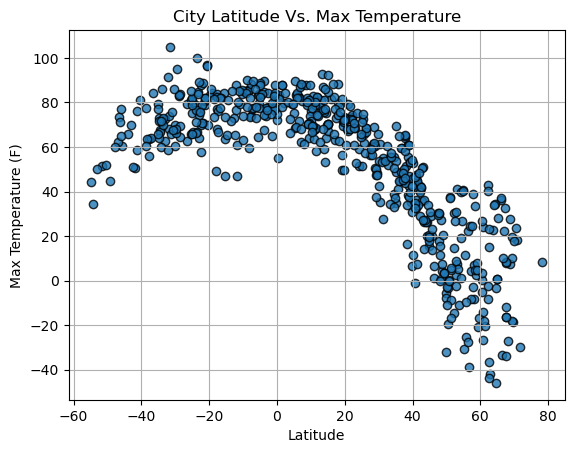

In [28]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(lats, max_temps, edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude Vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

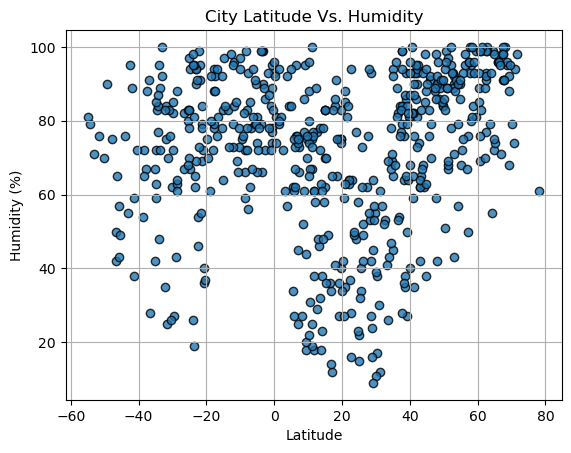

In [29]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(lats, humidity, edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude Vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

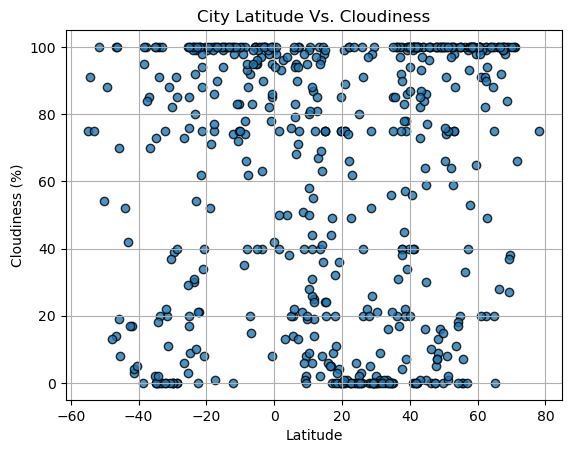

In [30]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(lats, cloudiness, edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude Vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

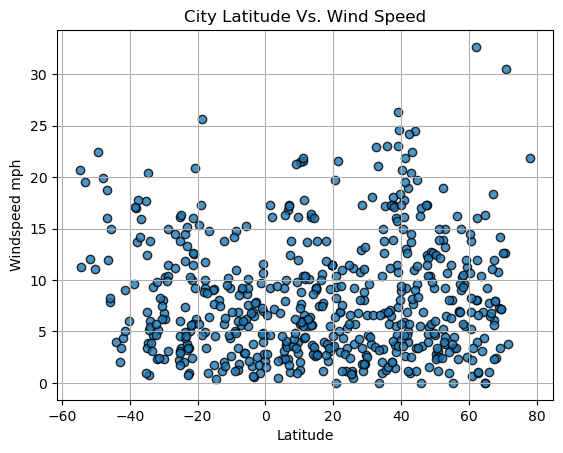

In [38]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(lats, city_data_df["Wind Speed"], edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude Vs. Wind Speed")
plt.ylabel("Windspeed mph")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [40]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [41]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) > 0, :]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,jamestown,42.0970,-79.2353,40.55,90,100,18.99,US,1705122074
3,hawaiian paradise park,19.5933,-154.9731,71.11,83,0,11.50,US,1705122334
4,sandnessjoen,66.0217,12.6316,36.12,96,100,7.81,NO,1705122335
5,itoman,26.1247,127.6694,68.40,52,20,9.22,JP,1705122335
10,ust-nera,64.5667,143.2000,-45.99,99,88,4.34,RU,1705122337


In [42]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,65.82,76,52,4.00,NZ,1705122333
1,puerto ayora,-0.7393,-90.3518,77.56,95,8,7.00,EC,1705122334
6,port-aux-francais,-49.3500,70.2167,44.67,90,88,22.44,TF,1705122335
7,booue,-0.0921,11.9385,71.94,93,42,2.13,GA,1705122336
8,margaret river,-33.9500,115.0667,86.07,48,91,5.99,AU,1705122139


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8645383086510351
-----------------------------------


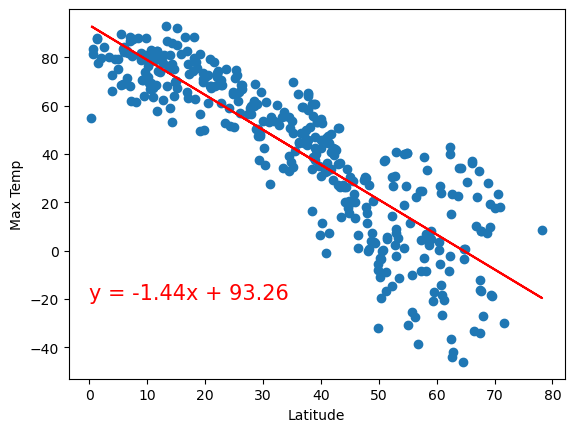

In [44]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')
print("-----------------------------------")

The r-value is 0.4648279570835129
-----------------------------------


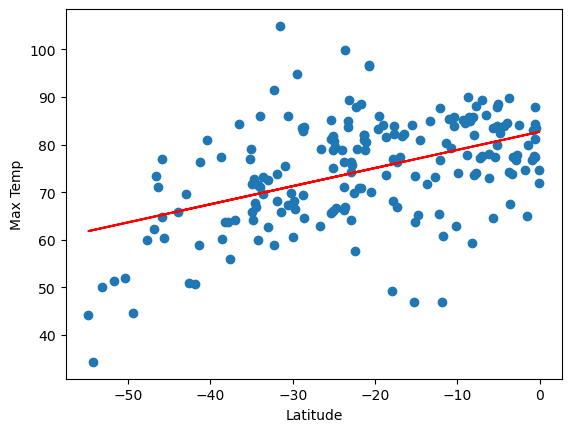

In [45]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')
print("-----------------------------------")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.4452457955937266
-----------------------------------


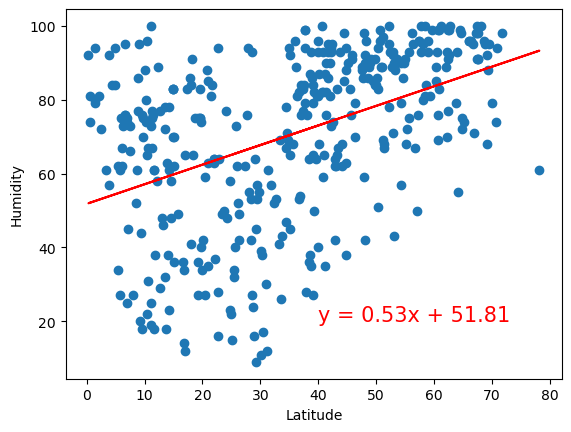

In [46]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')
print("-----------------------------------")

The r-value is 0.31024256683950485
-----------------------------------


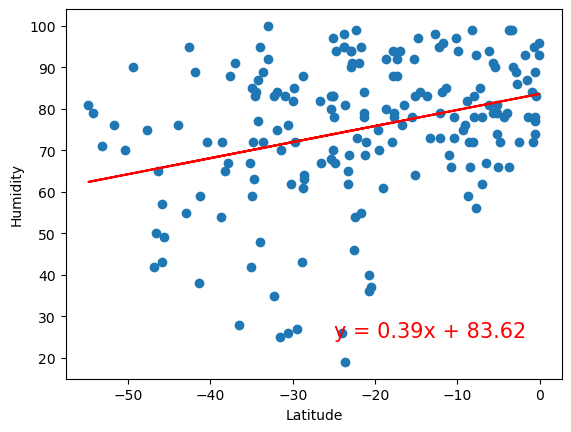

In [47]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')
print("-----------------------------------")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.2593545428823159
-----------------------------------


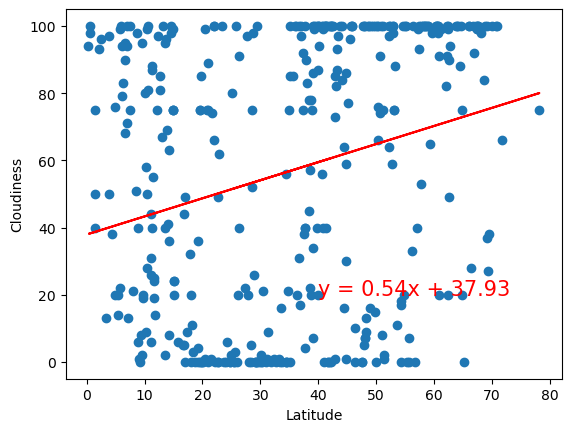

In [48]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')
print("-----------------------------------")

The r-value is 0.37825627508272186
-----------------------------------


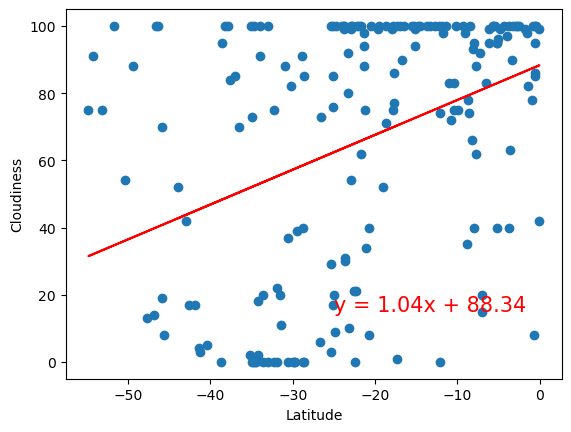

In [49]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')
print("-----------------------------------")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.07251116285419423
-----------------------------------


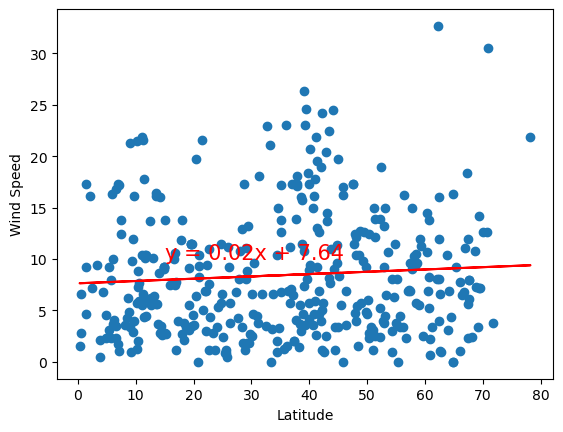

In [50]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(15,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')
print("-----------------------------------")

The r-value is -0.33814599911329324
-----------------------------------


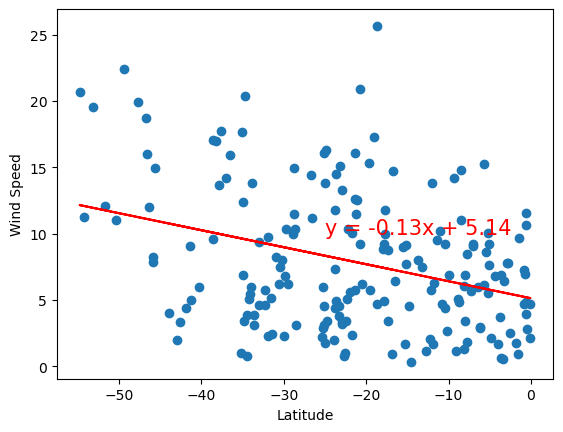

In [51]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')
print("-----------------------------------")

**Discussion about the linear relationship:** YOUR RESPONSE HERE